# Quantum Data Processing Module

## Introduction

QDPM is a Python program handling our experiment configuration and data analysis. It is a step towards all-Python sequence generating and data processing workflow. 

Main goals:
- easy access to experiment setup
- data processing & fitting
- cooperate with PyQLab(QGL) to provide data-based sequence update
- integrate into LabVIEW to achieve feedback capability
- automatic qubit tune-up (long term)

## Examples

### Qubit Ramsey experiment

In [1]:
import qdpm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br/><br/>Call class **Experiment** to initiate data processing.<br/><br/>

In [3]:
ramsey_exp = qdpm.Experiment(r'O:\68707\BF2222\LABVIEWdata\Cooldown20200221_Nb_SWIPHT_MB_W8_180nm\Heterodyne\Full spectrum from Ramsey\00 -- 10\2020_02_24_17_59_27')

<br/><br/>Experiment configuration and data is packed into the object ***ramsey_exp***.<br/><br/>

In [4]:
ramsey_exp.scan_setup

,0,1
Enabled,TRUE,TRUE
Target,Sequencer,Repeat
Parameter,N.A.,Smp
Scan #,0,1
Object #,999,999
Start,0.000000,0.000000
Stop,0.000000,999.000000
# of Step,1,1000


In [5]:
ramsey_exp.scan_size

array([ 101, 1000])

In [6]:
ramsey_exp.scan_value

[array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  4

<br/><br/>Experiment data can be accessed with attribute **data**. It is indexed as **data**\[*readout resonator index*\]\[*quadrature index*\]\[*scan size*\]<br/><br/>

In [7]:
ramsey_exp.data[0][0][0, 999]

0.008475724

<br/><br/>Then, the program uses support vector machine to classify each shot into ground or excited state.<br/><br/>

In [8]:
clf = qdpm.SingleQubitClassifier(ramsey_exp, qubit=0)

In [10]:
print(clf.c_matrix)

<bound method QubitClassifier.c_matrix of <qdpm.analysis.classifier.SingleQubitClassifier object at 0x00000185C0EE4A60>>


In [ ]:
clf.plot_boundary()

<br/><br/>Method **ClassifierOneQubit.predict()** is called to decide states of all shots.<br/><br/>

In [ ]:
prediction = clf.predict()

In [ ]:
prediction

In [ ]:
population = prediction.mean(axis=1)
tau = np.linspace(0, 50, ramsey_exp.scan_size[0])

<br/><br/>Call class **RamseyFit** to do curve fitting and plotting.<br/><br/>

NameError: name 'tau' is not defined

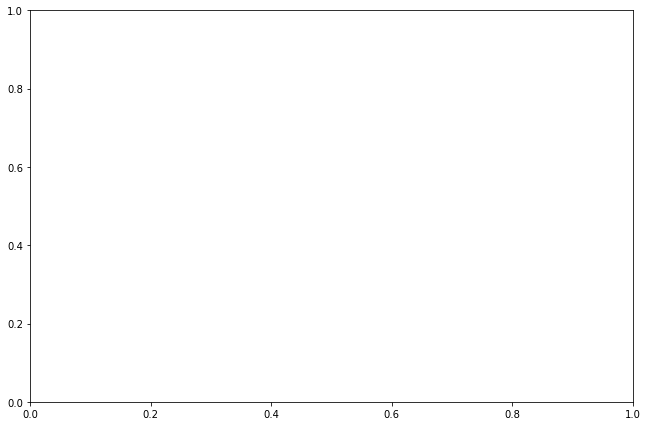

In [19]:
fig, ax = plt.subplots(figsize=(10.8, 7.2))
ramsey_fit = qdpm.RamseyFit(tau, population, two_freqs=False, make_plots=True, ax=ax)
ax.set_xlabel(r'Ramsey delay ($\mu s$)')
ax.set_ylabel(r'$P_e$')
ax.set_xlim(0, 50)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.show()

<br/><br/>Analysis results are packed into ***ramsey_fit*** object.<br/><br/>

In [ ]:
print(ramsey_fit)

In [ ]:
ramsey_fit.fit_params

In [ ]:
ramsey_fit.fit_errors

<br/><br/>

### State Tomography Experiment

In [20]:
from qutip import identity, tensor, basis
from qutip.qip.operations import rx, ry, cphase

<br/><br/>Call class **Experiment** to initiate data processing.<br/><br/>

In [21]:
state_tomo_exp = qdpm.Experiment(r'O:\68707\BF2222\LABVIEWdata\Cooldown20200221_Nb_SWIPHT_MB_W8_180nm\Heterodyne\QST\Free evolution CZ_Pulse Train\YPiO2 X YPiO2\2020_03_01_23_44_29')

<br/><br/>Then we have to define some constants before constructing a state tomography experiment.<br/><br/>

In [13]:
rotation = [identity(2),
            rx(-np.pi/2),
            ry(np.pi/2)]

initial_state = tensor((basis(2, 0) + basis(2, 1)).unit(),
                       (basis(2, 0) + basis(2, 1)).unit())
target = cphase(np.pi) * initial_state

<br/><br/>Call class **StateTomography** to construct the experiment.<br/><br/>

In [14]:
tomo = qdpm.StateTomography(state_tomo_exp, rotation, theory_state=target)

In [22]:
tomo.rho_mle

array([[ 0.24975094+0.j        ,  0.24997658-0.06014595j,
         0.21756623-0.04967486j, -0.2270638 +0.06459926j],
       [ 0.24997658+0.06014595j,  0.2841651 +0.j        ,
         0.20808963+0.0192791j , -0.23508099+0.00313321j],
       [ 0.21756623+0.04967486j,  0.20808963-0.0192791j ,
         0.23750806+0.j        , -0.22504788+0.01211812j],
       [-0.2270638 -0.06459926j, -0.23508099-0.00313321j,
        -0.22504788-0.01211812j,  0.22858101+0.j        ]])

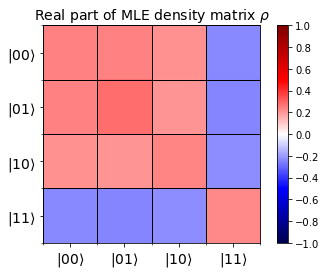

In [16]:
tomo.plot(part='real', ax=None)
plt.show()

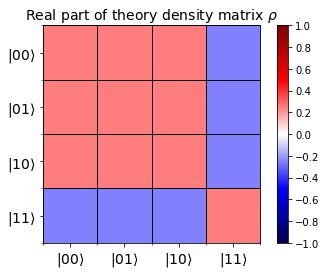

In [23]:
tomo.plot_theory(part='real', ax=None)
plt.show()

In [24]:
tomo.fidelity

0.9650978395524734

<br/><br/>

### LabVIEW Integration

Python code:<br/><br/>

In [ ]:
def ramsey(path):
    exp_path = Path(path)
    img_path = exp_path.joinpath('ramsey.png')
    
    ramsey_exp = qdpm.Experiment(path)
    clf = qdpm.ClassifierOneQubit(ramsey_exp, qubit=1)
    
    prediction = clf.predict()
    population = prediction.mean(axis=1)
    tau = np.linspace(0, 50, ramsey_exp.scan_size[0])
    
    fig, ax = plt.subplots()
    ramsey_fit = qdpm.RamseyFit(tau, population, two_freqs=False, make_plots=True, ax=ax)
    ax.set_xlabel(r'Ramsey delay ($\mu s$)')
    ax.set_ylabel(r'$P_e$')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    fig.savefig(img_path)
    
    return [str(img_path), str(ramsey_fit.fit_params['tau'])]

## Development progress

- Program core part is close to finished
- Run tests on more data to debug
- Documentation